<a href="https://colab.research.google.com/github/codewithswatiee/DS-AI-ML/blob/main/EDA_on_Sugarcane_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('/content/List of Countries by Sugarcane Production.csv')

In [53]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data Cleaning

In [54]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace(".", "")
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace(".", "").str.replace(",", ".")
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace(".", "")
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace(".", "").str.replace(",", ".")

In [55]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [56]:
df.rename(columns={'Production (Tons)': 'Production(tons)'}, inplace=True)
df.rename(columns={'Production per Person (Kg)': 'Production_per_person(kg)'}, inplace=True)
df.rename(columns={'Acreage (Hectare)': 'Acreage(hectare)'}, inplace=True)
df.rename(columns={'Yield (Kg / Hectare)': 'Yield(kg/hectare)'}, inplace=True)

In [57]:
df.head()

,Unnamed: 0,Country,Continent,Production(tons),Production_per_person(kg),Acreage(hectare),Yield(kg/hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [58]:
df.isnull().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(tons),0
Production_per_person(kg),0
Acreage(hectare),1
Yield(kg/hectare),1


In [59]:
df[df['Acreage(hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(tons),Production_per_person(kg),Acreage(hectare),Yield(kg/hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [60]:
df = df.dropna().reset_index()

In [61]:
df.drop(["index", "Unnamed: 0"], axis=1, inplace=True)

In [62]:
df.head()

,Country,Continent,Production(tons),Production_per_person(kg),Acreage(hectare),Yield(kg/hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [63]:
df.dtypes

,0
Country,object
Continent,object
Production(tons),object
Production_per_person(kg),object
Acreage(hectare),object
Yield(kg/hectare),object


In [64]:
df['Production(tons)'] = df['Production(tons)'].astype(float)
df['Production_per_person(kg)'] = df['Production_per_person(kg)'].astype(float)
df['Acreage(hectare)'] = df['Acreage(hectare)'].astype(float)
df['Yield(kg/hectare)'] = df['Yield(kg/hectare)'].astype(float)

In [65]:
df.dtypes

,0
Country,object
Continent,object
Production(tons),float64
Production_per_person(kg),float64
Acreage(hectare),float64
Yield(kg/hectare),float64


In [67]:
df.nunique()

,0
Country,102
Continent,6
Production(tons),102
Production_per_person(kg),101
Acreage(hectare),101
Yield(kg/hectare),102


### Univariate Analysis

how many countries produce sugarcan from each continent

<Axes: xlabel='Continent'>

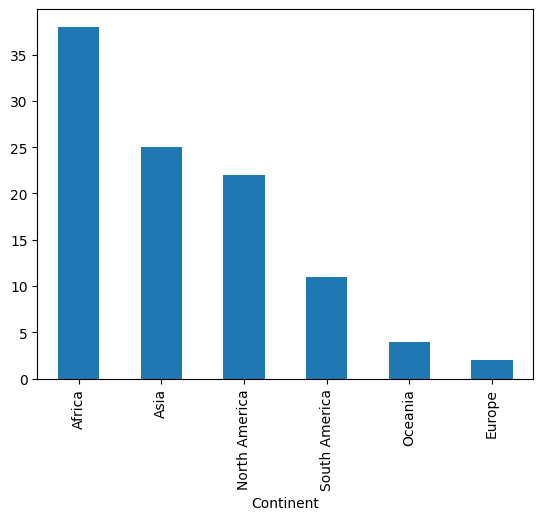

In [69]:
df['Continent'].value_counts().plot(kind='bar')

<ipython-input-73-4119d5fa60d9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(tons)'])
<ipython-input-73-4119d5fa60d9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_person(kg)'])
<ipython-input-73-4119d5fa60d9>:7: UserWarning: 

`distplot` is a deprecated 

<Axes: xlabel='Yield(kg/hectare)', ylabel='Density'>

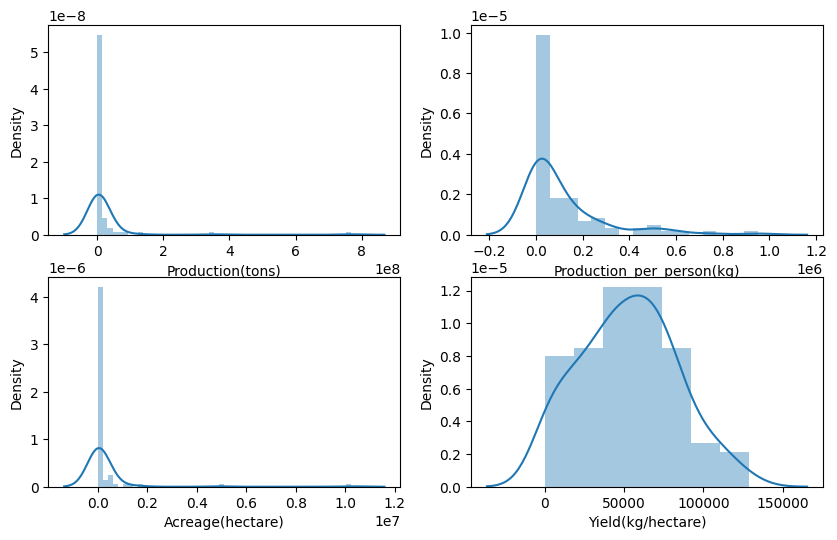

In [73]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.distplot(df['Production(tons)'])
plt.subplot(2, 2, 2)
sns.distplot(df['Production_per_person(kg)'])
plt.subplot(2, 2, 3)
sns.distplot(df['Acreage(hectare)'])
plt.subplot(2, 2, 4)
sns.distplot(df['Yield(kg/hectare)'])

<Axes: ylabel='Yield(kg/hectare)'>

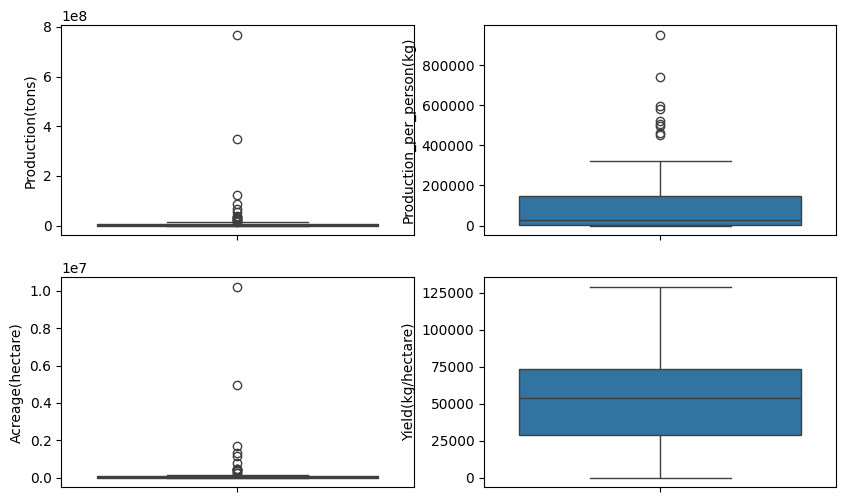

In [74]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(df['Production(tons)'])
plt.subplot(2, 2, 2)
sns.boxplot(df['Production_per_person(kg)'])
plt.subplot(2, 2, 3)
sns.boxplot(df['Acreage(hectare)'])
plt.subplot(2, 2, 4)
sns.boxplot(df['Yield(kg/hectare)'])

In [75]:
df.describe()

,Production(tons),Production_per_person(kg),Acreage(hectare),Yield(kg/hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


which country produces maximum sugarcane?

In [76]:
df_new = df[['Country', 'Production(tons)']].set_index('Country')

In [83]:
df_new['Production(tons)_percentage'] = df_new['Production(tons)'] * 100 / df_new['Production(tons)'].sum()

<Axes: ylabel='Production(tons)_percentage'>

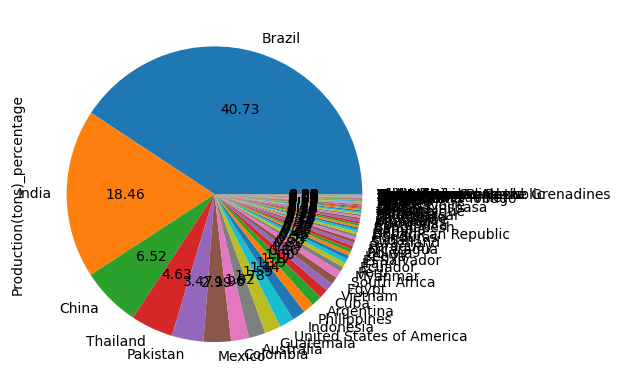

In [87]:
df_new['Production(tons)_percentage'].plot(kind='pie', autopct = "%.2f")

<Axes: xlabel='Country'>

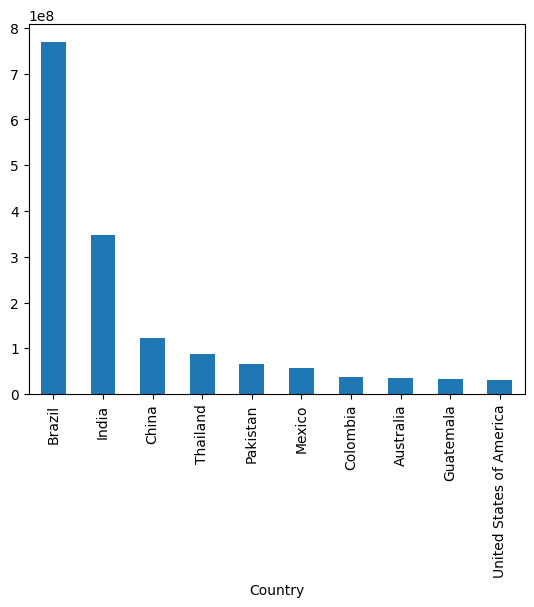

In [89]:
df_new['Production(tons)'].head(10).plot(kind='bar')

<ipython-input-91-bd2a5c0ef979>:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(data = df.head(10), x='Country', y='Production(tons)').set_xticklabels(labels=df.head(10)['Country'], rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

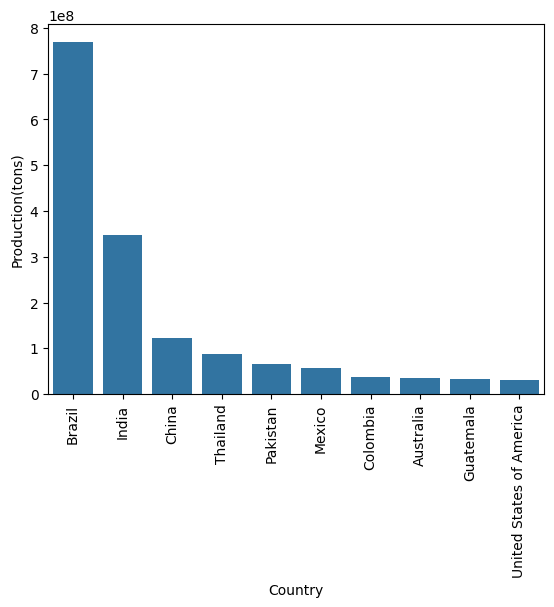

In [91]:
sns.barplot(data = df.head(10), x='Country', y='Production(tons)').set_xticklabels(labels=df.head(10)['Country'], rotation=90)

which country has the highest land?

<ipython-input-94-f40a07235baa>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(data = df_acr.head(10), x='Country', y='Acreage(hectare)').set_xticklabels(labels=df_acr.head(10)['Country'], rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Cuba'),
 Text(9, 0, 'Colombia')]

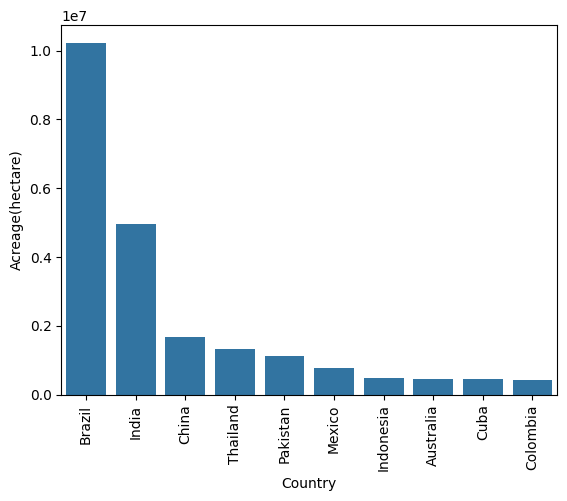

In [94]:
df_acr = df.sort_values(by='Acreage(hectare)', ascending=False)

sns.barplot(data = df_acr.head(10), x='Country', y='Acreage(hectare)').set_xticklabels(labels=df_acr.head(10)['Country'], rotation=90)

which country has highest yield?

<ipython-input-95-5994edafeb54>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(data = df_y.head(10), x='Country', y='Yield(kg/hectare)').set_xticklabels(labels=df_y.head(10)['Country'], rotation=90)


[Text(0, 0, 'Guatemala'),
 Text(1, 0, 'Senegal'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'Malawi'),
 Text(5, 0, 'Chad'),
 Text(6, 0, 'Zambia'),
 Text(7, 0, 'Burkina Faso'),
 Text(8, 0, 'Swaziland'),
 Text(9, 0, 'Nicaragua')]

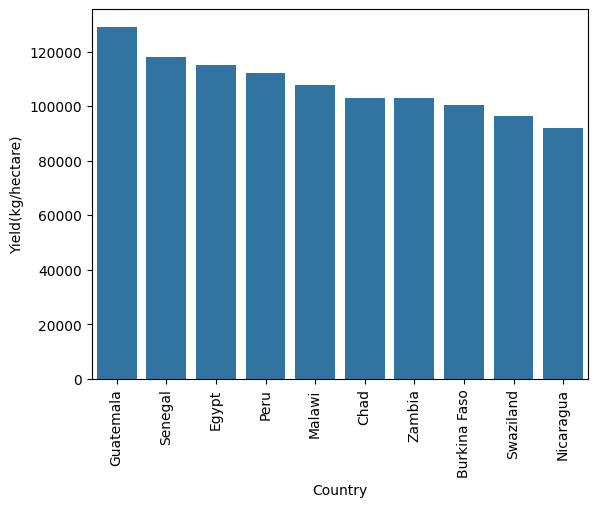

In [95]:
df_y = df.sort_values(by='Yield(kg/hectare)', ascending=False)

sns.barplot(data = df_y.head(10), x='Country', y='Yield(kg/hectare)').set_xticklabels(labels=df_y.head(10)['Country'], rotation=90)

Correlation

In [105]:
numerical_column = df[df.select_dtypes(include=np.number).columns]
numerical_column.corr()

,Production(tons),Production_per_person(kg),Acreage(hectare),Yield(kg/hectare)
Production(tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(kg),0.015000,1.000000,0.012557,0.017999
Acreage(hectare),0.997550,0.012557,1.000000,0.113433
Yield(kg/hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

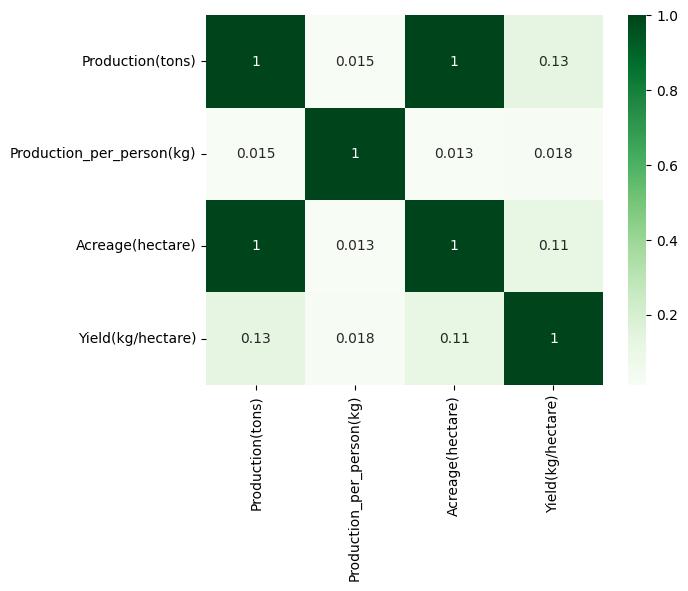

In [108]:
sns.heatmap(numerical_column.corr(), annot=True, cmap='Greens')

do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(hectare)', ylabel='Production(tons)'>

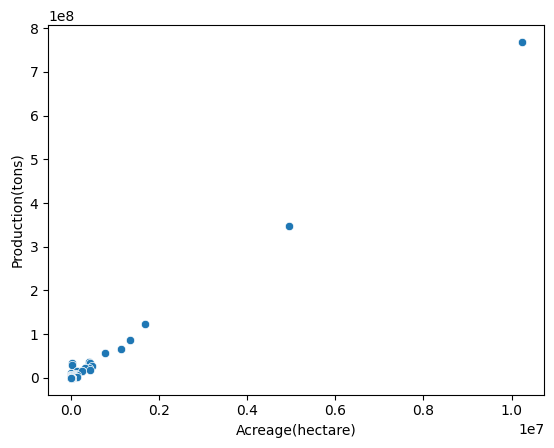

In [109]:
sns.scatterplot(data=df, x='Acreage(hectare)', y='Production(tons)')  #so yes

Analysis for Continent

In [111]:
df_contient = df.groupby("Continent").sum()
df_contient

,Country,Production(tons),Production_per_person(kg),Acreage(hectare),Yield(kg/hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


which continent produces max sugarcane?

In [114]:
df_contient.sort_values(by='Production(tons)', ascending=False)

,Country,Production(tons),Production_per_person(kg),Acreage(hectare),Yield(kg/hectare)
Continent,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9


<Axes: xlabel='Continent'>

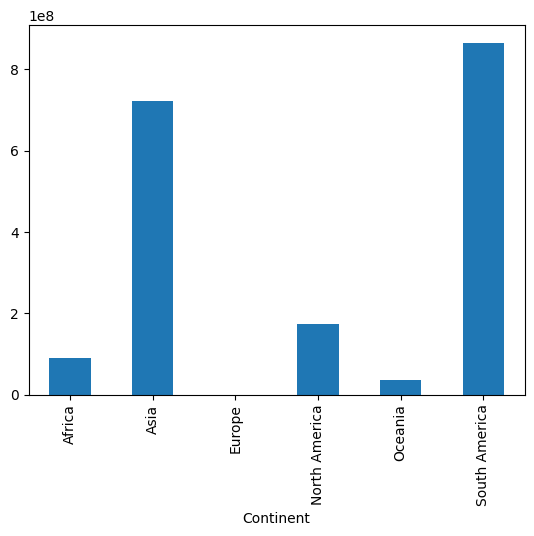

In [115]:
df_contient["Production(tons)"].plot(kind='bar')